In [ ]:
%%script false
%cd /content/drive/MyDrive/Google Colab/NLP/Technometrics
%ls

/content/drive/MyDrive/Google Colab/NLP/Technometrics
Bi-LSTM_V1.ipynb           Predict_Text.ipynb
Bi-LSTM_V2.ipynb           Pretrained_Models/
Classification_Algo.ipynb  Process_Data/
Dataset/                   Saved_Model/
External.ipynb             Technometrics_Preprocessing.ipynb


In [ ]:
%ls Saved_Model

 Biderectional_alt.h5               KNeighborsClassifier_model.pkl
 Biderectional_alt.npy              LinearSVC_model.pkl
 Biderectional.h5                   LogisticRegression_model.pkl
 Biderectional_hist.npy             MultinomialNB_model.pkl
 Biderectional_model/               Performance_Matrix.csv
 Classifier_Performance.csv         store/
 DecisionTreeClassifier_model.pkl  'Techno Matrix'/


In [ ]:
import sys
import pandas as pd
import numpy as np
from gensim.models import FastText
%matplotlib inline
import tensorflow as tf
from termcolor import colored, cprint

class Text_Classification:
  def __init__(self):
    self.stop_words = pd.read_csv('/Dataset/bangla_stop_word_471.csv')
    self.fasttext_model = FastText.load('Pretrained_Models/fasttext_model_20/fasttext_model.model')
    self.Text_Classifier_model = tf.keras.models.load_model('Saved_Model/Biderectional.h5')

  def change_model(self, num):
    if num == 2: self.Text_Classifier_model = tf.keras.models.load_model('Saved_Model/Biderectional_alt.h5') ;return 'Bi-LSTM_V2'
    if num == 1: self.Text_Classifier_model = tf.keras.models.load_model('Saved_Model/Biderectional.h5') ;return 'Bi-LSTM_V1'

  def find_class(self, text_vector):
    classes = ['economy', 'education', 'entertainment', 'international', 'sports','state', 'technology']
    text_arr = np.asarray(text_vector)
    output_values = list(self.Text_Classifier_model.predict(text_arr)[0])
    return classes[output_values.index(max(output_values))]

  def input_preprocessing(self, input_text):
    input_text = [word for word in input_text.split() if not word in self.stop_words]
    if len(input_text) > 350:
      return 'Please enter 350 word as input'

    text_vector = []
    word_to_vec_len = 350                                           
    k = len(input_text)
    temp = []
    for j in range(k):
      try:
        vector_a = self.fasttext_model.wv.get_vector(input_text[j])
        temp.append(vector_a)
      except:
        temp.append(np.zeros((20,), dtype=np.float32))
        continue
    if k < word_to_vec_len:                                           
      k = word_to_vec_len - k;
      for p in range(k):
        temp.append(np.zeros((20,), dtype=np.float32))
    text_vector.append(temp)
    
    return self.find_class(text_vector).upper()

if __name__ == "__main__":
  Classification = Text_Classification()
  cprint("           Text Classifier Tool Options", 'cyan', attrs=['bold'], file=sys.stderr)
  def option_info(model_v):
    print(colored("=====================================================", 'yellow'))
    print("1) -1 Exit from the System\n2) 1 for Bi-LSTM_V1 to Activate\n2) 2 for Bi-LSTM_V2 to Activate")
    print(colored("=====================================================", 'yellow'))
    print(colored("=====================================================", 'green'))
    print("               Model Arc. : ",colored(model_v, 'red'))
    print(colored("                 [Start Classify]", 'yellow'))
    print(colored("=====================================================", 'green'))
  option_info('Bi-LSTM_V1')
  while 1:
    input_text = input('Input Text (str) : ')
    if input_text == '-1': 
      print(colored("=====================================================", 'yellow'))
      print(colored('                !!! Thaknk You !!! ','green')); 
      print(colored("=====================================================", 'yellow'))
      break

    if input_text == '1': 
      option_info(Classification.change_model(int(input_text)))
    elif input_text == '2': 
      option_info(Classification.change_model(int(input_text)))
    else:
      output_class = Classification.input_preprocessing(input_text)
      print(colored(input_text, 'blue'))
      print('                  Class is :',colored(output_class, 'red'))
      print(colored("=====================================================", 'green'))

           Text Classifier Tool Options


1) -1 Exit from the System
2) 1 for Bi-LSTM_V1 to Activate
2) 2 for Bi-LSTM_V2 to Activate
               Model Arc. :  Bi-LSTM_V1
                 [Start Classify]
Input Text (str) : অথচ আইসিসির বর্ষসেরা ওয়ানডে দলে নেই সাকিব
অথচ আইসিসির বর্ষসেরা ওয়ানডে দলে নেই সাকিব
                  Class is : SPORTS
Input Text (str) : ঢাকাকে যানজটমুক্ত করার প্রতিশ্রুতি আতিকুলের
ঢাকাকে যানজটমুক্ত করার প্রতিশ্রুতি আতিকুলের
                  Class is : STATE
Input Text (str) : অস্কার মনোনয়ন বাদ গেল না কোনো ছবি
অস্কার মনোনয়ন বাদ গেল না কোনো ছবি
                  Class is : ENTERTAINMENT
Input Text (str) : -1
                !!! Thaknk You !!! 


In [ ]:
input_text = 'অথচ আইসিসির বর্ষসেরা ওয়ানডে দলে নেই সাকিব'
input_text = 'ঢাকাকে যানজটমুক্ত করার প্রতিশ্রুতি আতিকুলের'
input_text = 'অস্কার মনোনয়ন বাদ গেল না কোনো ছবি'

# Model Performance

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

%matplotlib inline

In [ ]:
history = np.load('Saved_Model/Biderectional_alt.npy',allow_pickle=True).tolist()

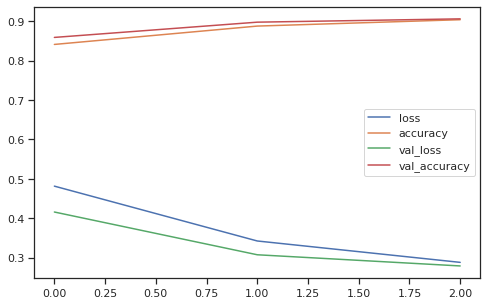

In [ ]:
pd.DataFrame(history).plot(figsize=(8,5))
plt.show()

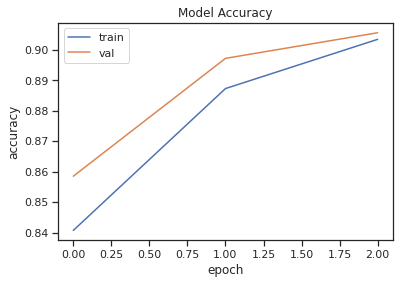

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

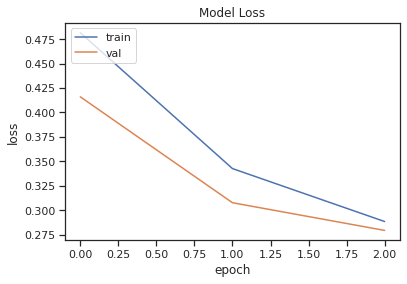

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict Text in your machine

In [ ]:
!python Predict_Your_Text.py

2021-10-20 03:30:07.058481: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-20 03:30:07.058540: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e343da74293c): /proc/driver/nvidia/version does not exist
           Text Classifier Tool Options
1) -1 Exit from the System
2) 1 for Bi-LSTM_V1 to Activate
2) 2 for Bi-LSTM_V2 to Activate
               Model Arc. :  Bi-LSTM_V1
                 [Start Classify]
Input Text (str) : -1
                !!! Thaknk You !!! 
